In [102]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

# Очистка, выявление nan и анализ столбцов оп типам

## Первичный анализ

In [103]:
raw_data = pd.read_csv('data/train.csv')

In [104]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
raw_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [107]:
is_na = raw_data.isna().sum(axis=0)
is_na[is_na !=0]

Age         177
Cabin       687
Embarked      2
dtype: int64

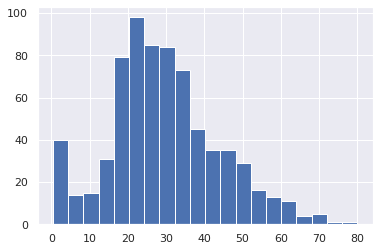

In [108]:
age_clear = raw_data['Age'].dropna()
plt.hist(age_clear, bins=20);

Анализ столбцов:
* Name - можно откинуть, так как слишком много уникальных значений
* Ticket - откидываем, так как слишком много уникальных значений
* Cabin - откидываем, так как много na, слишком много уникальных значений
* PassengerID- откидывам; не несет полезной информации
* Sex - преобразуем с помощью one hot encodeing
* Embarked - откинем nan из-за их небольшого количества и преобразуем в one hot encodnig
* Age - Похоже на то что имеет стандартное распределение, поэтому будем заменять отсутствующие значения при помощи алгоритмов машинного обучения

## Очистка

### Отбрасываю ненужные столбцы и обрабатываю категориальные данные

In [109]:
df_cleaned = raw_data.drop(labels=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
df_cleaned.dropna(inplace=True, subset=['Embarked'])
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked'])
df_cleaned['Sex'].replace(to_replace=['male', 'female'], value=[1, 0], inplace=True)
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Заменяю nan в Age при помощи KNN

In [110]:
from sklearn.impute import KNNImputer

In [111]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X = df_cleaned.drop(labels=['Survived'], axis=1)
X_transformed = imputer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

Text(0.5, 1.0, 'nans replaced by knn')

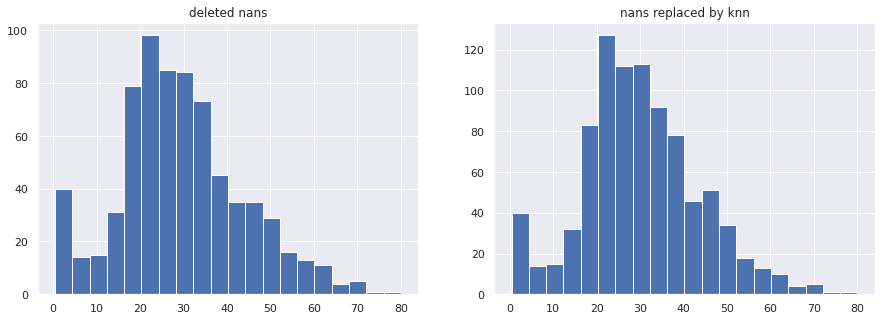

In [112]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
bins = 20
axis[0].hist(age_clear, bins=bins)
axis[0].set_title('deleted nans')


axis[1].hist(X_transformed['Age'], bins=bins)
axis[1].set_title('nans replaced by knn')

Как мы видим, распределение данных не поменялось, поэтому остановимся на этом варианте

In [113]:
df_cleaned['Age'] = X_transformed['Age']

In [114]:
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,26.8,0,0,13.0000,0,0,1
887,1,1,0,26.0,0,0,30.0000,0,0,1
888,0,3,0,32.0,1,2,23.4500,0,0,1
889,1,1,1,NaN,0,0,30.0000,1,0,0


# Выдвижение и проверка гипотез

## Гипотезы


* Age влияет на выживаемость и тут нет линейной кореляции
* Fare имеет положительную корелляцию с выживаемостью
* Pclass имеет отрицательную корелляцию с выживаемостью
* Fare и Pclass - взаимозаменяемые параметры модели
* SibSp и Parch можно комбинировать в один параметер(Relatives) и этот параметер будет иметь пололжительную корелляцию с выживаемостью
* Embarked имеет связь с Pclass и Fare и соотвественно связан с Survived, так как города могут отличаться по средней состоятельности граждан
* Sex=0(женщины) имеют больше шансов выжить чем мужчины
* Большое значение "Relatives" - положительно влияют на мужчин и не влияет на женщин
* В зависимости от пола может менять корреляция Pclass и Survived

## Проверка гипотез

### Age влияет на выживаемость и тут нет линейной кореляции

Сначала проверим на данных полученных при помощи knn

<AxesSubplot:xlabel='Age', ylabel='Count'>

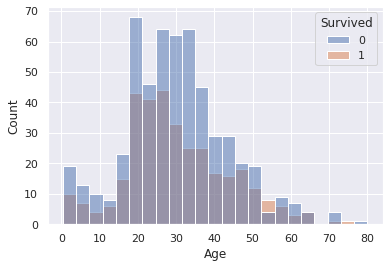

In [115]:
sns.histplot(df_cleaned, x='Age', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

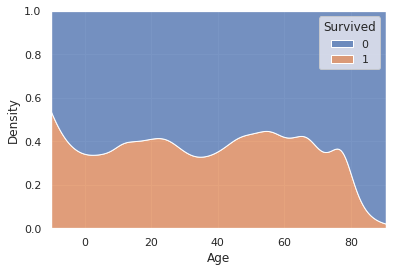

In [116]:
sns.kdeplot(
    data=df_cleaned,
    x='Age', hue='Survived',
    multiple="fill")

Возраст в одиночку практически не влияет на выживаемость

(array([0.00611916, 0.00437083, 0.02709913, 0.03890037, 0.02622497,
        0.01180124, 0.01442373, 0.00437083, 0.0026225 , 0.00043708]),
 array([ 0.67 ,  8.003, 15.336, 22.669, 30.002, 37.335, 44.668, 52.001,
        59.334, 66.667, 74.   ]),
 <BarContainer object of 10 artists>)

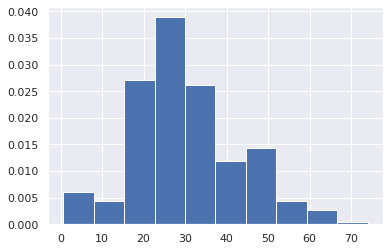

In [117]:
plt.hist(df_cleaned[df_cleaned['Sex'] == 0]['Age'], density=True)

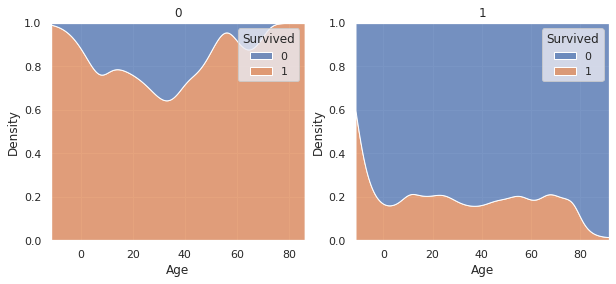

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    sns.kdeplot(data=df_cleaned[df_cleaned['Sex'] == i], x='Age', hue='Survived', ax=axes[i] ,multiple="fill")
    axes[i].set_title(i)

# axes[0].hist(df_cleaned[df_cleaned['Sex'] == 0]['Age'], density=True)
# sns.kdeplot(data=df_cleaned[df_cleaned['Sex'] == 0], x='Age', ax=axes[0])

<AxesSubplot:xlabel='Age', ylabel='Count'>

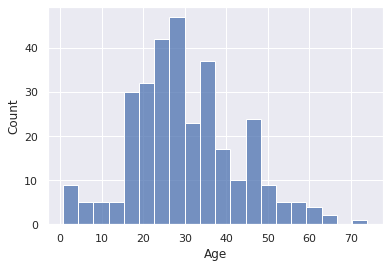

In [119]:
sns.histplot(df_cleaned[df_cleaned['Sex'] == 0], x='Age', bins=20)

In [120]:
# TODO: Создать график распределения и вероятности

Выводы:
* Возраст не имеет линейной корелляции с выживаемостью
* Для мужчин зависимость выживаемости от возраста не видна
* Для женщин возраст влияет на выживаемость, но это может быть вызвано небольшим количеством данных
* Для линейной регрессии лучше выкинуть возраст



### Fare имеет положительную корелляцию с выживаемостью

<AxesSubplot:xlabel='Fare', ylabel='Density'>

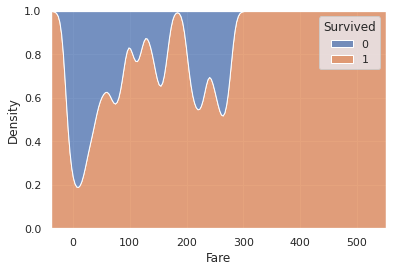

In [121]:
sns.kdeplot(data=df_cleaned, x='Fare', hue='Survived' ,multiple="fill")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

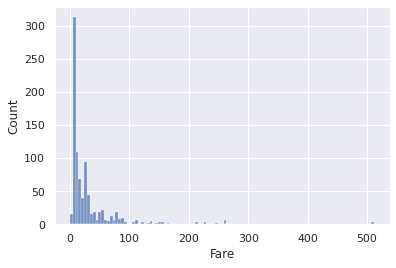

In [122]:
sns.histplot(data=df_cleaned, x='Fare', )

Распределение с очень длинным хвостом

In [123]:
df_cleaned['Fare'].quantile([0.25, 0.5, 0.75, 0.85, 0.95])

0.25      7.89580
0.50     14.45420
0.75     31.00000
0.85     56.37664
0.95    112.31832
Name: Fare, dtype: float64

In [124]:
df_cleaned[df_cleaned['Pclass'] == 1]['Fare'].quantile([0.25, 0.5, 0.75, 0.85, 0.95])

0.25     30.77185
0.50     58.68960
0.75     93.50000
0.85    135.63330
0.95    234.52353
Name: Fare, dtype: float64

In [125]:
quantile_95 = np.quantile(df_cleaned['Fare'], 0.95)
less_95 = df_cleaned[df_cleaned['Fare'] < quantile_95]
more_95 = df_cleaned[df_cleaned['Fare'] > quantile_95]

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

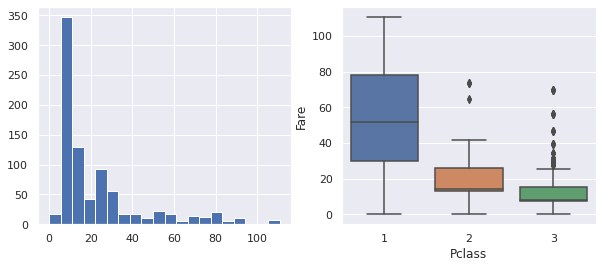

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(less_95['Fare'], bins=20);
sns.boxplot(data=less_95, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

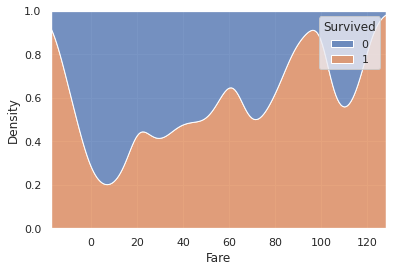

In [127]:
sns.kdeplot(data=less_95, x='Fare', hue='Survived' ,multiple="fill")

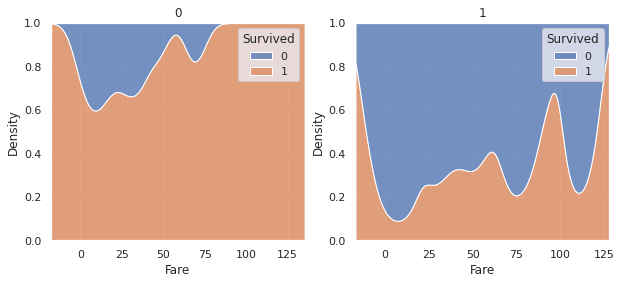

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
    sns.kdeplot(data=less_95[less_95['Sex']==i], x='Fare', hue='Survived' ,multiple="fill", ax=axes[i])
    axes[i].set_title(i)

(array([20.,  5.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([113.275  , 153.18042, 193.08584, 232.99126, 272.89668, 312.8021 ,
        352.70752, 392.61294, 432.51836, 472.42378, 512.3292 ]),
 <BarContainer object of 10 artists>)

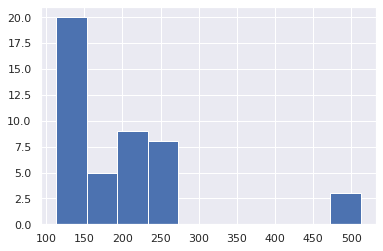

In [129]:
plt.hist(more_95['Fare'])

Выводы:
* Имеет длинный хвост
* 95% данных находятся в промежутке от 0 до 100. 5% неравномерно распределены между 100 и 500
* Есть линейная зависимость между Fare и выживаемостью, причем она видна как для мужчин, так и для женщин

Итог: Данный параметер надо оставить для тренирования модели, но стоит избавиться от выброса(значения>300)

### Pclass имеет отрицательную корелляцию с выживаемостью

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

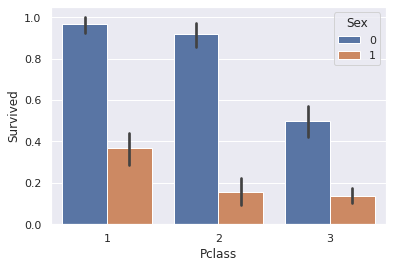

In [130]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived', hue='Sex')

Вывод: как для мужчин, так и для женщин класс влияет на выживаемость, что логично

### SibSp и Parch можно комбинировать в один параметер(сумму) и этот параметер будет иметь пололжительную корелляцию с выживаемостью

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

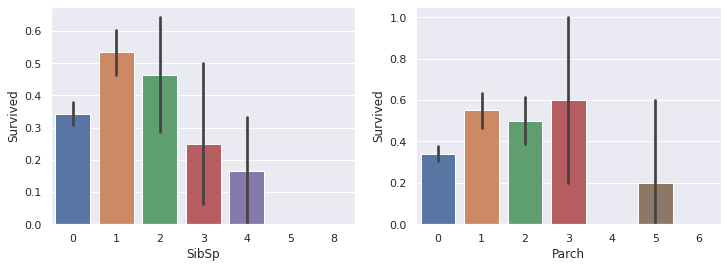

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=df_cleaned, x='SibSp', y='Survived', ax=axes[0])
sns.barplot(data=df_cleaned, x='Parch', y='Survived', ax=axes[1])

In [132]:
df_vis = df_cleaned.copy()
df_vis['Relatives'] = df_vis['SibSp'] + df_vis['Parch']

<AxesSubplot:xlabel='Relatives', ylabel='Survived'>

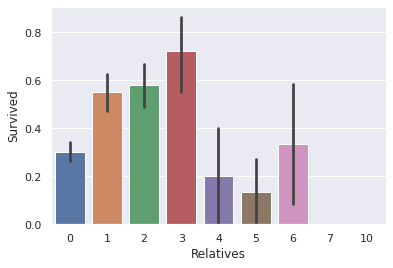

In [133]:
sns.barplot(data=df_vis, x='Relatives', y='Survived')

Выводы:
* Сумма SibSp и Parch - это параметер, имеющий положительную коррелляцию

### Embarked имеет связь с Pclass и Fare и соотвественно связан с Survived, так как города могут отличаться по средней состоятельности граждан

In [134]:
df_vis = df_cleaned.copy()
df_vis.drop(labels=['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
df_vis['Embarked'] = raw_data['Embarked']

<AxesSubplot:xlabel='Embarked', ylabel='count'>

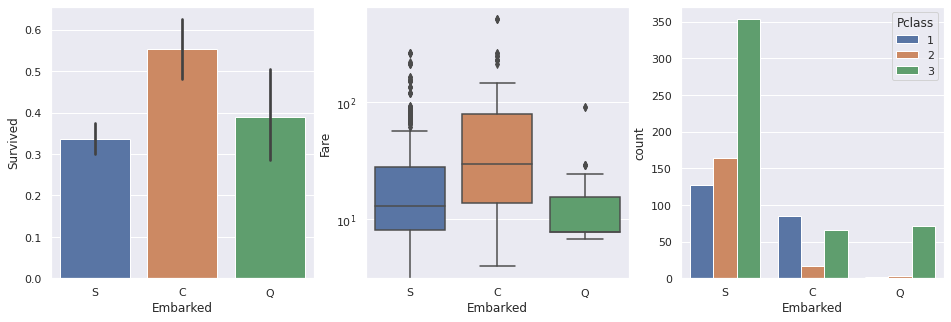

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.barplot(data=df_vis, x='Embarked', y='Survived', ax=axes[0])
sns.boxplot(data=df_vis, x='Embarked', y='Fare', ax=axes[1])
axes[1].set_yscale("log")
sns.countplot(data=df_vis, hue='Pclass', x='Embarked', ax=axes[2])

Выводы:
* Embarked зависит от Fare и Pclass, поэтому корреляция между Embrked и Survived вызвана не самим этим параметром, а его связью с двумя другими, которые уже в свою очередь определеяют выживаемость, поэтому от данного параметра можно избавиться

### Sex=0(женщины) имеют больше шансов выжить чем мужчины

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

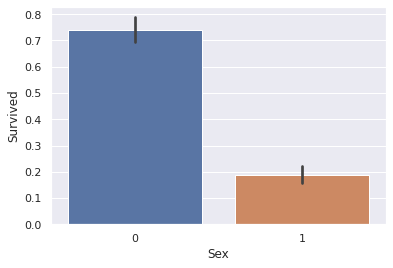

In [136]:
sns.barplot(data=df_cleaned, x='Sex', y='Survived')

### Большое значение "Relatives" - положительно влияют на мужчин и не влияет на женщин

In [137]:
df_vis = df_cleaned.copy()
df_vis['Relatives'] = df_vis['SibSp'] + df_vis['Parch']

<AxesSubplot:xlabel='Relatives', ylabel='Survived'>

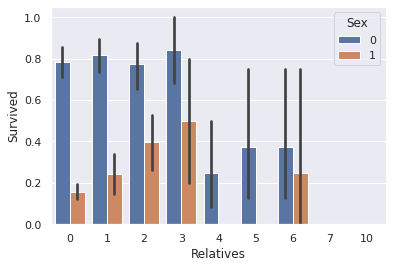

In [138]:
sns.barplot(data=df_vis, x='Relatives', y='Survived', hue='Sex')

<AxesSubplot:xlabel='Relatives', ylabel='count'>

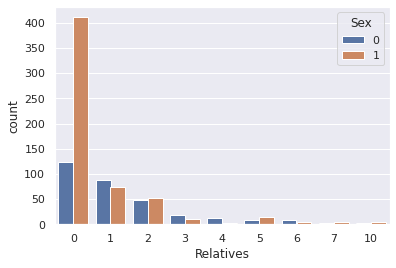

In [139]:
sns.countplot(data=df_vis, x='Relatives', hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

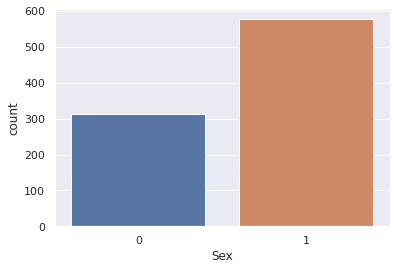

In [140]:
sns.countplot(data=df_cleaned, x='Sex')

Вывод:
* Гипотеза верна
* Возможно имеет смысл сделать два классификатора(1 - для женщин, 2 - для мужчин) из-за различий, которые возникают с relatives

### В зависимости от пола может менять корреляция Pclass и Survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

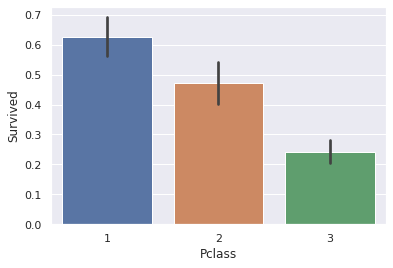

In [141]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

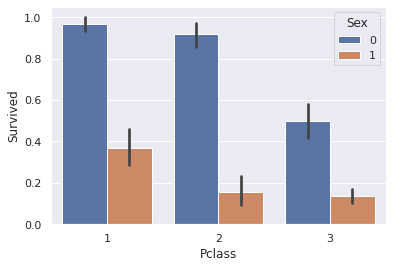

In [142]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived', hue='Sex')

Выводы:
* Для мужчин заметный скачек наблюдается только для превого класса
* Для женщин скачек начинается с второго класса

Итог для модели:
* Ecли мы будем тренировать два модели(для женщин и мужчин), то для Pclass надо сделать one_hot_encoding
* Иначе, one_hot_encoding делать не надо

In [143]:
del df_vis

# Создание моделей

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Две отдельные линейные регрессии для мужчин и женщин соответственно

### Подготовка данных

In [145]:
df_model = df_cleaned.copy()
df_model['Relatives'] = df_model['Parch'] + df_model['SibSp']
df_model.drop(labels=['Embarked_S', 'Embarked_Q', 'Embarked_C', 'Age', 'SibSp'], axis=1, inplace=True)
df_model = df_model[df_model['Fare']<400]

df_women = df_model[df_model['Sex'] == 0]
df_women.drop(labels=['Sex'], axis=1, inplace=True)
df_men = df_model[df_model['Sex'] == 1]
df_men.drop(labels=['Sex'], axis=1, inplace=True)

/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
df_women

,Survived,Pclass,Parch,Fare,Relatives
1,1,1,0,71.2833,1
2,1,3,0,7.9250,0
3,1,1,0,53.1000,1
8,1,3,2,11.1333,2
9,1,2,0,30.0708,1
...,...,...,...,...,...
880,1,2,1,26.0000,1
882,0,3,0,10.5167,0
885,0,3,5,29.1250,5
887,1,1,0,30.0000,0


### Параметры модели

In [147]:
grid_model = Pipeline([('data_transformer', MinMaxScaler()), ('estimator', LogisticRegression())])
grid_parameters = [
    {
        'estimator__fit_intercept': [False, True],
        'estimator__C': [0.001, 0.01, 0.4, 1, 2, 4, 8 ,10, 100],
        'estimator__class_weight': ['balanced']
    }]
grid = GridSearchCV(grid_model, grid_parameters, cv=10, scoring='f1_micro')

In [148]:
def confusion_matrix_and_f_score(X_test, y_test, estimator):
    pred = estimator.predict(X_test)
    real = y_test

    g = sns.heatmap(confusion_matrix(real, pred), annot=True, fmt="d")
    g.set_xlabel('Predicted')
    g.set_ylabel('Real')
    print('f-score:', f1_score(real, pred))

### Тренировка модели для мужчин

f-score: 0.3384615384615385
0.7514450867052023


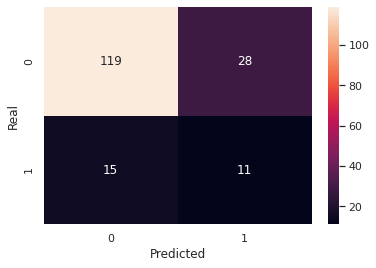

In [149]:
X = df_men.drop(labels='Survived', axis=1)
y = df_men['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

grid.fit(X_train, y_train)
estimator_men = grid.best_estimator_
confusion_matrix_and_f_score(X_test, y_test, estimator_men)
print(grid.score(X_test, y_test))

### Тренировка модели для женщин

f-score: 0.8034188034188033
accuracy: 0.7553191489361702


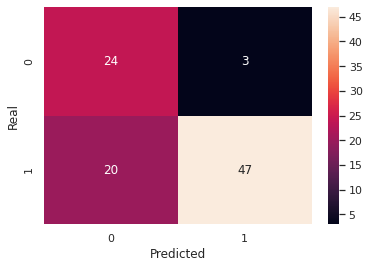

In [150]:
X = df_women.drop(labels='Survived', axis=1)
y = df_women['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
grid.fit(X_train, y_train)

estimator_women = grid.best_estimator_
confusion_matrix_and_f_score(X_test, y_test, estimator_women)
print('accuracy:', grid.score(X_test, y_test))

Данная модель успешна т.к. у нее нормальный F-score и точность

### Тренировка модели для предсказаний на основании 2-х предыдущих моделей и пола

In [227]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted


class MainClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator_men, estimator_women, fit_intercept, C, class_weight):
        self.estimator_men = estimator_men
        self.estimator_women = estimator_women
        self.fit_intercept = fit_intercept
        self.C = C
        self.class_weight = class_weight
        self.main_estimator = None

    def tranform_X_for_main_estimator(self, X):
        # Вычисление вероятностей для женщин
        X_women = X[X['Sex'] == 0]
        X_women.drop(labels=['Sex'], axis=1, inplace=True)
        predicted_woman = self.estimator_women.predict(X_women)
        # Вычисление вероятностей для мужчин
        X_man = X[X['Sex'] == 1]
        X_man.drop(labels=['Sex'], axis=1, inplace=True)
        predicted_man = self.estimator_men.predict(X_man)

        # Запись данных для главного классификатора в DataFrame
        samples = X.shape[0]
        X_for_main_estimator = pd.DataFrame(np.empty((samples,2),dtype='int'),columns=['Predict_proba', 'Sex'])
        X_for_main_estimator['Sex'] = X['Sex']
        X_for_main_estimator[X['Sex'] == 1]['Predict_proba'] = predicted_man.copy()
        X_for_main_estimator[X['Sex'] == 0]['Predict_proba'] = predicted_woman.copy()

        return X_for_main_estimator

    def fit(self, X, y):
        # Check that X and y have correct shape
        X_transformed = self.tranform_X_for_main_estimator(X)

        self.main_estimator = LogisticRegression(C=self.C, fit_intercept=self.fit_intercept, class_weight=self.class_weight)
        self.main_estimator.fit(X_transformed, y)
        return self

    def predict(self, X):
        if check_is_fitted:
            X_transformed = self.tranform_X_for_main_estimator(X)
            return self.main_estimator.predict(X_transformed)
        else:
            raise ValueError("Main estimator isn't fitted")

    def check_is_fitted(self):
        return self.main_estimator is not None

In [228]:
c = MainClassifier(estimator_men, estimator_women, True, 1, 'balanced')

In [229]:

df_train, df_test = train_test_split(df_model,train_size=0.7)
for df in [df_train, df_test]:
    df.reset_index(drop=True, inplace=True)
X_train = df_train.drop(labels=['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.drop(labels=['Survived'], axis=1)
y_test = df_test['Survived']
c.fit(X_train, y_train);

/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-227-bd248906728a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

MainClassifier(C=1, class_weight='balanced',
               estimator_men=Pipeline(steps=[('data_transformer',
                                              MinMaxScaler()),
                                             ('estimator',
                                              LogisticRegression(C=0.001,
                                                                 class_weight='balanced',
                                                                 fit_intercept=False))]),
               estimator_women=Pipeline(steps=[('data_transformer',
                                                MinMaxScaler()),
                                               ('estimator',
                                                LogisticRegression(C=0.001,
                                                                   class_weight='balanced'))]),
               fit_intercept=True)

In [230]:
c.tranform_X_for_main_estimator(X_train)

/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-227-bd248906728a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Predict_proba,Sex
0,140442070245712,1
1,93914974800496,0
2,140442062977136,1
3,140442064940016,1
4,140441889561968,1
...,...,...
615,2314903123004497969,1
616,2314906503547596337,0
617,2314885530819627569,1
618,2314885530818457632,0


Проблемы возникшие при решении задачи:
* X_for_main_estimator[X['Sex'] == 1]['Predict_proba'] = predicted_man.copy() - данная строчка работает некорректно, потому что записывает просто непонятные большие значения
* Модели для мужчин и женщин хоть и имеют хороший F-score и среднюю accuracy, но вероятности, которые они предсказывают очень близки в 0.5, поэтому такие данные дают мало полезной информации для основного классификатора

TODO:
* Написать трансформатор в отдельную функцию и не делать целый класс(потом будет создан Pipeline из этой ф-ции и конечного классификатора)
* Поиграться со значением C для мужчин и женщин или попробовать другие модели